In [2]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor, Resize
import matplotlib.pyplot as plt
import os
import torch.nn.functional as F

import glob as glob
import pandas as pd
import torchvision
from torchvision.io import read_video as read_video
from torchvision.io import write_video as write_video

In [3]:
root_path = "/Users/andrew/Desktop/cs196/RWF2000_short_version/*"

In [4]:
class CustomImageDataset(Dataset):
    def __init__(self, train = True): # accept the 'train' status, but set it to 'True' as default
        self.n_frames_per_video = 150 # since all of our videos have 150 frames
        
        self.paths = [] #we change from 'paths' to 'self.paths' to make it accessible in 'len' and 'getitem'
        folder = glob.glob(root_path)
        
        for folder in folder: #train and val
            if train == ("train" in folder): #check 1) what data does this instance want (train or test), 2) select only the folders with corresponding label
                sub_folders = glob.glob(folder + "/*")
                for sub_folder in sub_folders:
                    files = glob.glob(sub_folder + "/*.avi")
                    for file in files:
                        self.paths.append(file)
        self.data = []
        for path in self.paths:
            self.data.append(read_video(path))
    
    def __len__(self):
        return len(self.paths) * self.n_frames_per_video
        # len(self.paths) returns the total amount of .avi videos
        # len(self.paths) * self.n_frames_per_video returns the total amount of frames

    def __getitem__(self, idx):
        ''' This is the code when our data are videos.
        path = paths[idx]
        example = read_video(path) # convert the video in the path into tensor, and returns it
        label = not 'NonFight' in path # label == True == 1 -> 1 means there is a fight
        return example[0], label #image, label
        '''
        
        '''
        path_idx = idx // self.n_frames_per_video
        frame_idx = idx % self.n_frames_per_video
        
        path = self.paths[path_idx]
        
        example = read_video(path) # convert the video in the path into tensor, and returns it, 
                                    # but if we put this here, everytime we want a frame, we need to load the entire video,
                                    # so we're going to move it to __init__ function to make it load one video in only once, and keep it in the memory
        video_data = example[0]
        frame_data = video_data[frame_idx]
        '''
        
        path_idx = idx // self.n_frames_per_video
        frame_idx = idx % self.n_frames_per_video
        
        video_data = self.data[path_idx][0]
        frame_data = video_data[frame_idx]
        
        path = self.paths[path_idx]
        label = not 'NonFight' in path # label == True == 1 -> 1 means there is a fight
        
        return frame_data, label #image, label

In [ ]:
my_class = CustomImageDataset(train = True) # call the constructor
my_class2 = CustomImageDataset() #the same as my_class

train_set = my_class # set up the train set and test set
test_set = CustomImageDataset(train = False)

In [ ]:
my_class.paths == my_class2.paths

In [ ]:
print(len(my_class))
print(len(test_set))

In [ ]:
resp = my_class[100] # call 'getitem', and get the 100th frame
resp

In [ ]:
plt.imshow(resp[0]) # show the 100th frame's frame data

In [ ]:
resp[1] # get the 100th frame's label

In [11]:
example = read_video(my_class.paths[0])

In [12]:
example[0] #the video frames - we know this by looking at the return type of read_video

tensor([[[[ 47,  49,  34],
          [ 99, 101,  86],
          [ 96,  98,  81],
          ...,
          [250, 252, 235],
          [255, 255, 240],
          [117, 119, 102]],

         [[ 45,  47,  32],
          [ 97,  99,  84],
          [ 98, 100,  83],
          ...,
          [250, 252, 235],
          [250, 252, 235],
          [111, 113,  96]],

         [[ 45,  47,  32],
          [ 97,  99,  84],
          [ 96,  98,  81],
          ...,
          [250, 252, 235],
          [249, 251, 234],
          [112, 114,  97]],

         ...,

         [[ 19,  19,  19],
          [ 46,  46,  46],
          [ 40,  40,  40],
          ...,
          [ 62,  62,  62],
          [ 64,  64,  64],
          [ 37,  37,  37]],

         [[ 17,  17,  17],
          [ 39,  39,  39],
          [ 34,  34,  34],
          ...,
          [ 67,  67,  67],
          [ 68,  68,  68],
          [ 39,  39,  39]],

         [[ 18,  18,  18],
          [ 37,  37,  37],
          [ 33,  33,  33],
         

In [13]:
example[2]

{'video_fps': 30.0}

In [14]:
example[0].shape #example[0] is the video, output: torch.Size([number of frames, height in pixels, width in pixels, channels - RGB])

torch.Size([150, 224, 398, 3])

In [15]:
print(example[0][3][2][1]) #viewing the video, at frame with index 3, at pixel of index 2 in height and index 1 in width
print(example[0][0][0][0]) #output: tensor([Red, Green, Blue], dtype=torch.uint8)

tensor([101, 102,  93], dtype=torch.uint8)
tensor([47, 49, 34], dtype=torch.uint8)


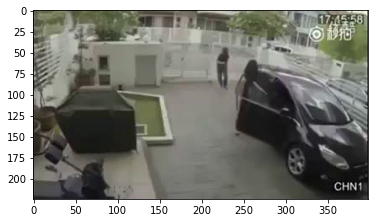

In [16]:
plt.imshow(example[0][0]) #view the first frame of the video data 